$Merit \; Function \; for \; Line \; search$

In [1]:
using LinearAlgebra
using ForwardDiff
using PyPlot

In [2]:
Q = Diagonal([0.5; 1.0])
function f(x)
    return 0.5 * (x - [1; 0])' * Q * (x - [1; 0])
end

function ∇f(x)
    return Q * (x - [1; 0])
end

function ∇2f(x)
    return Q
end

∇2f (generic function with 1 method)

In [3]:
# add equality constraint
function c_eq(x)
    return x[1]^2 + 2 * x[1] - x[2]
end

function ∂c_eq(x)
    return [2*x[1]+2 -1]
end

∂c_eq (generic function with 1 method)

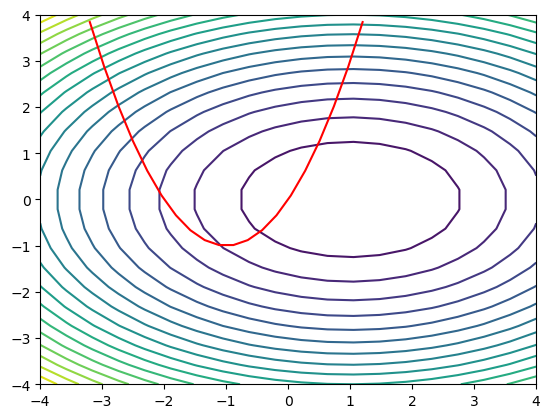

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000001DABA90>

In [20]:
function plot_landsacpe()
    Nsamp = 20
    Xsamp = kron(ones(Nsamp),LinRange(-4,4,Nsamp)')
    Ysamp = kron(ones(Nsamp)',LinRange(-4,4,Nsamp))
    Zsamp = zeros(Nsamp, Nsamp)
    for i=1:Nsamp
        for j=1:Nsamp
            Zsamp[i,j]=f([Xsamp[i,j]; Ysamp[i,j]])
        end
    end
    contour(Xsamp, Ysamp, Zsamp, Nsamp)
    
    xc = xc = LinRange(-3.2,1.2,Nsamp)
    plot(xc,xc.^2+2.0.*xc,"r")
end
plot_landsacpe()

In [21]:
function gauss_newton_step(x,λ)
    H = ∇2f(x)
    C = ∂c_eq(x)
    Δz = -[H C'; C 0] \ [∇f(x)+C'*λ; c_eq(x)]
    Δx = Δz[1:2]
    Δλ = Δz[3]
    return Δx, Δλ
end

gauss_newton_step (generic function with 1 method)

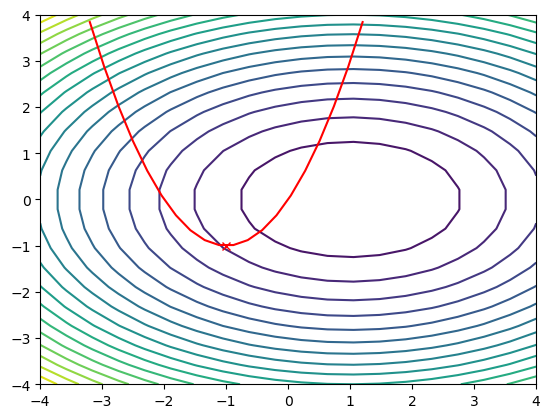

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000061F6CFA0>

In [35]:
xguess = [-1; -1]
λguess = [0.0]
plot_landsacpe()
plot(xguess[1], xguess[2], "rx")

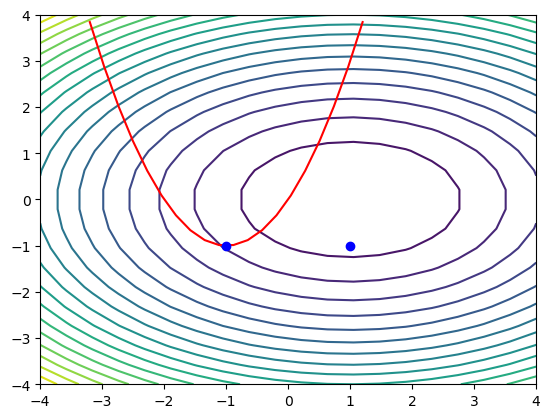

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000061FC6460>

In [36]:
Δx, Δλ = gauss_newton_step(xguess[:,end],λguess[end])
xguess = [xguess xguess[:,end]+Δx]
λguess = [λguess λguess[end]+Δλ]
plot_landsacpe()
plot(xguess[1,:], xguess[2,:], "bo")

In [37]:
function P(x, λ)
    ∇L = [-∇f(x)-∂c_eq(x)'*λ; -c(x)]
    return 0.5 * dot(∇L, ∇L)
end

function ∇P(x, λ)
    H = ∇2f(x) + ForwardDiff.jacobian(xn -> ∂c_eq(xn)'*λ, x)
    C = ∂c_eq(x)
    return [H C'; C 0]*[-∇f(x)-C'*λ; -c(x)]
end

∇P (generic function with 1 method)

In [38]:
ρ = 10
function P(x, λ)
    f(x) + ρ*norm(c_eq(x),1)
end
function ∇P(x,λ)
    [∇f(x) + ρ*∂c_eq(x)'*sign.(c_eq(x)); zeros(length(λ))]
end

∇P (generic function with 1 method)

In [39]:
ρ = 10.0
function P(x,λ)
    f(x) + λ'*c_eq(x) + 0.5*ρ*dot(c_eq(x),c_eq(x))
end
function ∇P(x,λ)
    [∇f(x) + ∂c_eq(x)'*(λ + ρ*c_eq(x)); c_eq(x)]
end

∇P (generic function with 1 method)

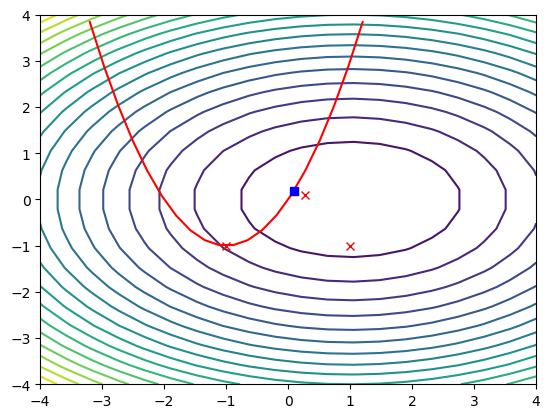

1

In [41]:
Δx, Δλ = gauss_newton_step(xguess[:,end],λguess[end])
α = 1
while P(xguess[:,end]+α*Δx, λguess[end]+α*Δλ) > P(xguess[:,end], λguess[end]) + 0.1*α*dot(∇P(xguess[:,end], λguess[end]),[Δx; Δλ])
    α = 0.8*α
end
xguess = [xguess xguess[:,end]+α*Δx]
λguess = [λguess λguess[end]+α*Δλ]
plot_landsacpe()
plot(xguess[1,:], xguess[2,:], "rx")
plot(xguess[1,end], xguess[2,end], "bs")
α